# 16PF Dominance (KAEL) Dimension Validation

**Date:** January 2025  
**Project:** SELVE Personality Framework  
**Goal:** Validate KAEL (Assertiveness/Dominance) dimension using 16PF D-scale

---

## Overview

### KAEL (🔥) - Assertiveness / Ambition

**Etymology:** Gaelic/Irish *caol* = "slender" (focused will) / "mighty warrior"  
**Meaning:** Warrior spirit, focused will to lead, fire of ambition

### 16PF Factor D (Dominance)

The D-scale measures dominance vs submissiveness in interpersonal interactions.

**10 Items:**
- D1-D6: Dominant/assertive behaviors ("I take charge", "I say what I think")
- D7-D10: Submissive behaviors - REVERSE SCORED ("I wait for others to lead", "I let myself be pushed around")

**Scale:** 5-point Likert (1 = strongly disagree, 5 = strongly agree)

**Expected Reliability:** α > 0.75 (acceptable), ideally α > 0.80 (good)

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
# Load 16PF dataset
data_path = '/home/chris/selve/data/openpsychometrics-rawdata/16PF/data.csv'
df = pd.read_csv(data_path, delimiter='\t')

print(f"✅ Dataset loaded")
print(f"Shape: {df.shape}")
print(f"\nFirst few columns: {list(df.columns[:15])}")
print(f"\nD-scale columns present: {[col for col in df.columns if col.startswith('D') and col[1:].isdigit()]}")

✅ Dataset loaded
Shape: (49159, 169)

First few columns: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'B1', 'B2', 'B3', 'B4', 'B5']

D-scale columns present: ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']


In [3]:
# Define D-scale items (Dominance)
d_scale_items = [f'D{i}' for i in range(1, 11)]

# Item descriptions (from codebook)
item_descriptions = {
    'D1': 'I take charge',
    'D2': 'I want to be in charge',
    'D3': 'I say what I think',
    'D4': 'I am not afraid of providing criticism',
    'D5': 'I take control of things',
    'D6': 'I can take strong measures',
    'D7': 'I wait for others to lead the way (R)',
    'D8': 'I never challenge things (R)',
    'D9': 'I let others make the decisions (R)',
    'D10': 'I let myself be pushed around (R)'
}

print(f"Total D-scale items: {len(d_scale_items)}")
print(f"\nItem descriptions:")
for item, desc in item_descriptions.items():
    print(f"  {item}: {desc}")

Total D-scale items: 10

Item descriptions:
  D1: I take charge
  D2: I want to be in charge
  D3: I say what I think
  D4: I am not afraid of providing criticism
  D5: I take control of things
  D6: I can take strong measures
  D7: I wait for others to lead the way (R)
  D8: I never challenge things (R)
  D9: I let others make the decisions (R)
  D10: I let myself be pushed around (R)


In [4]:
# Define reverse-scored items (submissive behaviors)
reverse_items = ['D7', 'D8', 'D9', 'D10']

print(f"Reverse-scored items: {len(reverse_items)}")
print(f"Items: {reverse_items}")
print(f"\n(These items measure submissiveness - need to be reversed to align with dominance)")

Reverse-scored items: 4
Items: ['D7', 'D8', 'D9', 'D10']

(These items measure submissiveness - need to be reversed to align with dominance)


In [5]:
# Data cleaning
# 1. Select D-scale columns
df_d = df[d_scale_items].copy()

# 2. Remove rows with 0 (missed responses)
print(f"Rows with 0 values (missed): {(df_d == 0).any(axis=1).sum()}")
df_d = df_d[(df_d != 0).all(axis=1)]

# 3. Check for missing values
print(f"Missing values before cleaning: {df_d.isna().sum().sum()}")
df_d = df_d.dropna()
print(f"Missing values after cleaning: {df_d.isna().sum().sum()}")

# 4. Ensure values are in valid range (1-5 for 5-point scale)
print(f"\nRows before range filtering: {len(df_d)}")
for col in d_scale_items:
    df_d = df_d[(df_d[col] >= 1) & (df_d[col] <= 5)]
print(f"Rows after range filtering: {len(df_d)}")

# 5. Sample for computational efficiency (if dataset is large)
if len(df_d) > 30000:
    df_d = df_d.sample(n=30000, random_state=42)
    print(f"\nSampled to 30,000 rows for analysis")

print(f"\nFinal dataset shape: {df_d.shape}")
print(f"\nDescriptive statistics:")
print(df_d.describe())

Rows with 0 values (missed): 1928
Missing values before cleaning: 0
Missing values after cleaning: 0

Rows before range filtering: 47231
Rows after range filtering: 47231

Sampled to 30,000 rows for analysis

Final dataset shape: (30000, 10)

Descriptive statistics:
                 D1            D2            D3            D4            D5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       3.487767      3.345000      3.592967      3.524533      3.664567   
std        1.020074      1.072635      1.034469      1.045993      0.948199   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      4.000000      4.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 D6  

In [6]:
# Apply reverse scoring
# For 5-point scale: reverse_score = 6 - original_score
df_d_corrected = df_d.copy()

for item in reverse_items:
    if item in df_d_corrected.columns:
        df_d_corrected[item] = 6 - df_d_corrected[item]

print(f"✅ Reverse scoring applied to {len(reverse_items)} items")
print(f"\nExample (D7 - 'I wait for others to lead the way'):")
print(f"  Before: mean = {df_d['D7'].mean():.3f}")
print(f"  After:  mean = {df_d_corrected['D7'].mean():.3f}")
print(f"  (Higher scores now indicate MORE dominance/assertiveness)")

✅ Reverse scoring applied to 4 items

Example (D7 - 'I wait for others to lead the way'):
  Before: mean = 2.676
  After:  mean = 3.324
  (Higher scores now indicate MORE dominance/assertiveness)


In [7]:
# Cronbach's Alpha calculation function
def cronbach_alpha(df, items):
    """
    Calculate Cronbach's alpha for internal consistency reliability.
    
    Alpha interpretation:
    - α ≥ 0.90: Excellent
    - 0.80 ≤ α < 0.90: Good
    - 0.70 ≤ α < 0.80: Acceptable
    - 0.60 ≤ α < 0.70: Questionable
    - α < 0.60: Poor
    """
    item_data = df[items]
    item_variances = item_data.var(axis=0, ddof=1)
    total_variance = item_data.sum(axis=1).var(ddof=1)
    
    k = len(items)
    alpha = (k / (k - 1)) * (1 - item_variances.sum() / total_variance)
    
    return alpha

print("✅ Cronbach's alpha function defined")

✅ Cronbach's alpha function defined


In [8]:
# Calculate Cronbach's alpha for D-scale
alpha_d = cronbach_alpha(df_d_corrected, d_scale_items)

print("=" * 60)
print("CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY")
print("=" * 60)

# Determine quality rating
if alpha_d >= 0.90:
    rating = "Excellent ⭐⭐⭐"
elif alpha_d >= 0.80:
    rating = "Good ✅"
elif alpha_d >= 0.70:
    rating = "Acceptable ✓"
elif alpha_d >= 0.60:
    rating = "Questionable ⚠️"
else:
    rating = "Poor ❌"

print(f"\n16PF D-Scale (Dominance)")
print(f"Items: {len(d_scale_items)}")
print(f"Sample size: {len(df_d_corrected):,}")
print(f"\nCronbach's Alpha: α = {alpha_d:.3f} - {rating}")
print("=" * 60)

# Summary
print("\n📈 SUMMARY:")
if alpha_d >= 0.80:
    print("✅ KAEL dimension shows GOOD internal consistency (α > 0.80)")
    print("✅ Ready for inclusion in SELVE framework")
elif alpha_d >= 0.70:
    print("✓ KAEL dimension shows ACCEPTABLE internal consistency (α > 0.70)")
    print("✓ Can be included in SELVE framework")
else:
    print("⚠️ KAEL dimension shows QUESTIONABLE internal consistency")
    print("⚠️ Consider item refinement before including in SELVE")

CRONBACH'S ALPHA - INTERNAL CONSISTENCY RELIABILITY

16PF D-Scale (Dominance)
Items: 10
Sample size: 30,000

Cronbach's Alpha: α = 0.821 - Good ✅

📈 SUMMARY:
✅ KAEL dimension shows GOOD internal consistency (α > 0.80)
✅ Ready for inclusion in SELVE framework


In [9]:
# Calculate D-scale score
df_d_corrected['D_score'] = df_d_corrected[d_scale_items].mean(axis=1)

print("✅ Dominance scores calculated")
print("\nScore distribution:")
print(df_d_corrected['D_score'].describe())

print(f"\nMean D-score: {df_d_corrected['D_score'].mean():.3f}")
print(f"Median D-score: {df_d_corrected['D_score'].median():.3f}")
print(f"Std Dev: {df_d_corrected['D_score'].std():.3f}")

✅ Dominance scores calculated

Score distribution:
count    30000.00000
mean         3.50561
std          0.63010
min          1.00000
25%          3.10000
50%          3.50000
75%          3.90000
max          5.00000
Name: D_score, dtype: float64

Mean D-score: 3.506
Median D-score: 3.500
Std Dev: 0.630


In [10]:
# Item-total correlations (how well each item correlates with total score)
print("=" * 60)
print("ITEM-TOTAL CORRELATIONS")
print("=" * 60)
print("\n(Higher values indicate item contributes well to scale)\n")

item_total_corrs = {}
for item in d_scale_items:
    # Calculate total score without this item
    other_items = [i for i in d_scale_items if i != item]
    total_without_item = df_d_corrected[other_items].mean(axis=1)
    
    # Correlate item with total
    corr = df_d_corrected[item].corr(total_without_item)
    item_total_corrs[item] = corr
    
    desc = item_descriptions[item]
    print(f"{item}: r = {corr:.3f} - {desc}")

print("\n" + "=" * 60)
print(f"Average item-total correlation: {np.mean(list(item_total_corrs.values())):.3f}")
print("(Target: r > 0.30 for good discrimination)")
print("=" * 60)

ITEM-TOTAL CORRELATIONS

(Higher values indicate item contributes well to scale)

D1: r = 0.674 - I take charge
D2: r = 0.496 - I want to be in charge
D3: r = 0.421 - I say what I think
D4: r = 0.425 - I am not afraid of providing criticism
D5: r = 0.601 - I take control of things
D6: r = 0.425 - I can take strong measures
D7: r = 0.624 - I wait for others to lead the way (R)
D8: r = 0.386 - I never challenge things (R)
D9: r = 0.537 - I let others make the decisions (R)
D10: r = 0.459 - I let myself be pushed around (R)

Average item-total correlation: 0.505
(Target: r > 0.30 for good discrimination)


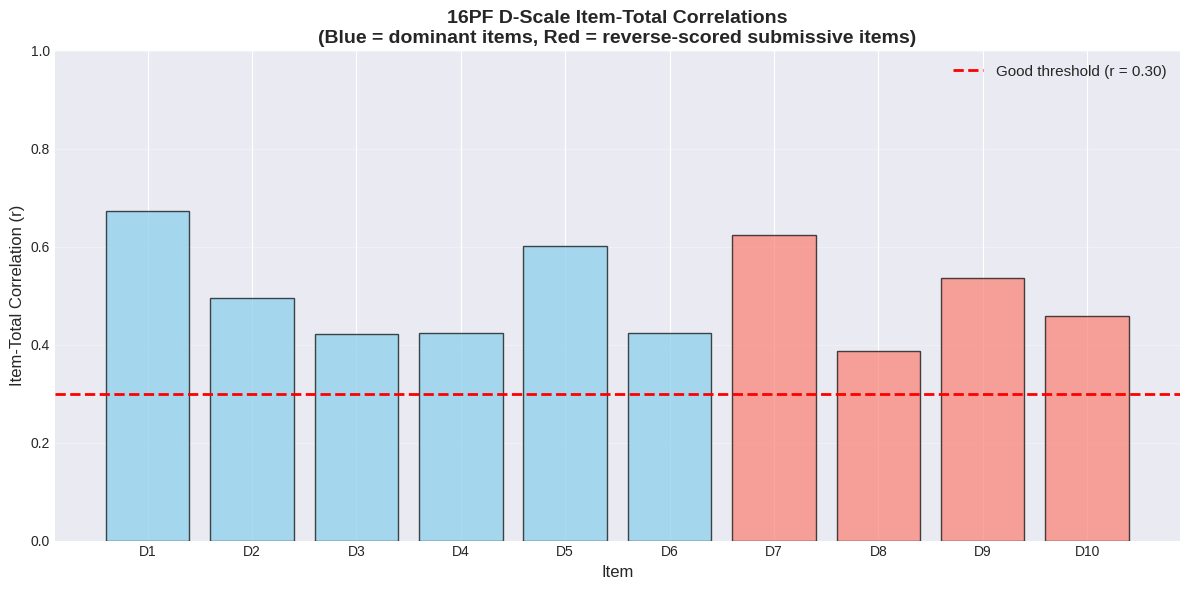

In [11]:
# Visualize item-total correlations
plt.figure(figsize=(12, 6))
items = list(item_total_corrs.keys())
corrs = list(item_total_corrs.values())

colors = ['skyblue' if i not in reverse_items else 'salmon' for i in items]
bars = plt.bar(items, corrs, color=colors, edgecolor='black', alpha=0.7)

plt.axhline(y=0.30, color='red', linestyle='--', linewidth=2, label='Good threshold (r = 0.30)')
plt.xlabel('Item', fontsize=12)
plt.ylabel('Item-Total Correlation (r)', fontsize=12)
plt.title('16PF D-Scale Item-Total Correlations\n(Blue = dominant items, Red = reverse-scored submissive items)', 
          fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

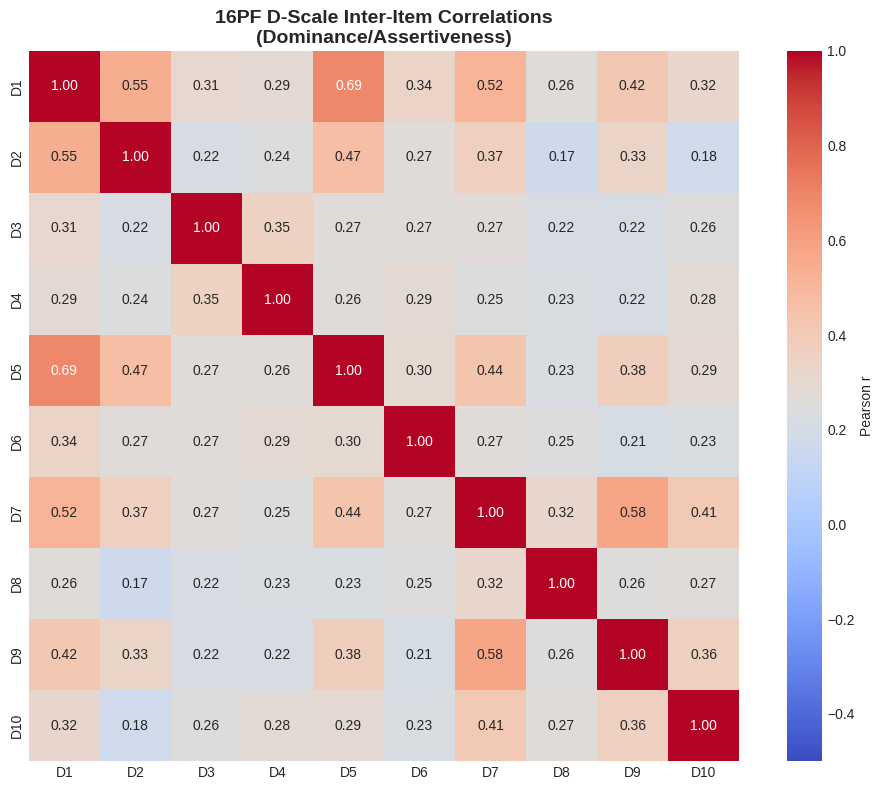


📊 Average inter-item correlation:
r = 0.314

(Moderate positive correlations indicate items measure same construct)


In [12]:
# Inter-item correlation matrix
corr_matrix = df_d_corrected[d_scale_items].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-0.5, vmax=1, square=True, cbar_kws={'label': 'Pearson r'})
plt.title('16PF D-Scale Inter-Item Correlations\n(Dominance/Assertiveness)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Average inter-item correlation:")
upper_tri = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
print(f"r = {upper_tri.mean():.3f}")
print("\n(Moderate positive correlations indicate items measure same construct)")

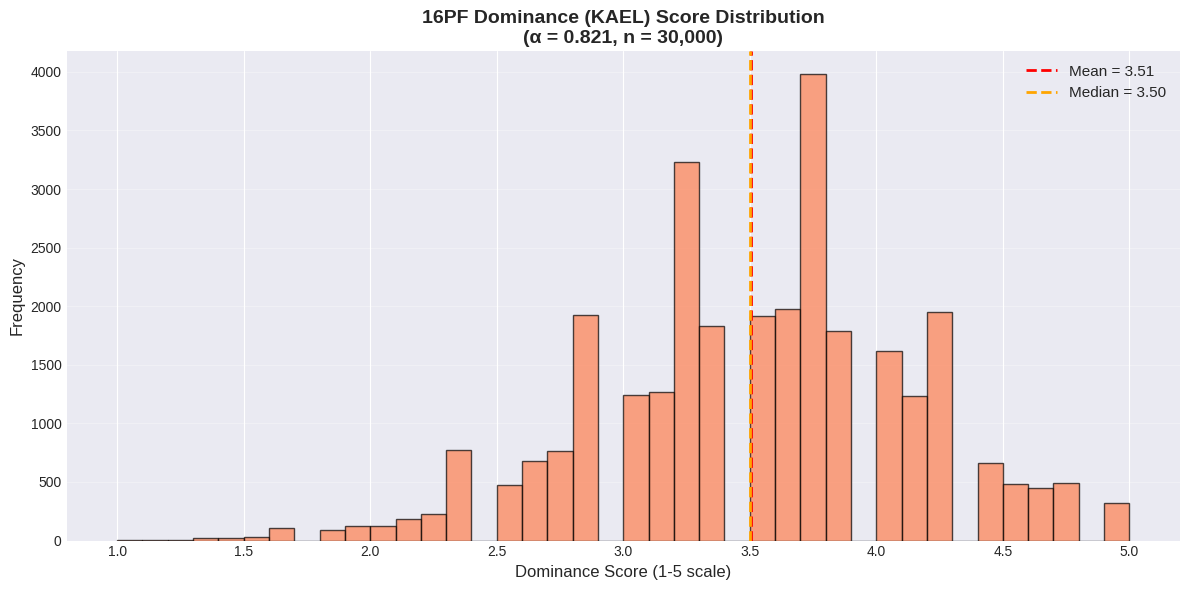


📊 Distribution Statistics:
Mean:     3.506
Median:   3.500
Std Dev:  0.630
Skewness: -0.321
Kurtosis: 0.117


In [13]:
# Distribution of D-scale scores
plt.figure(figsize=(12, 6))
plt.hist(df_d_corrected['D_score'], bins=40, color='coral', alpha=0.7, edgecolor='black')
plt.axvline(df_d_corrected['D_score'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean = {df_d_corrected["D_score"].mean():.2f}')
plt.axvline(df_d_corrected['D_score'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median = {df_d_corrected["D_score"].median():.2f}')
plt.xlabel('Dominance Score (1-5 scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'16PF Dominance (KAEL) Score Distribution\n(α = {alpha_d:.3f}, n = {len(df_d_corrected):,})', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Distribution Statistics:")
print(f"Mean:     {df_d_corrected['D_score'].mean():.3f}")
print(f"Median:   {df_d_corrected['D_score'].median():.3f}")
print(f"Std Dev:  {df_d_corrected['D_score'].std():.3f}")
print(f"Skewness: {df_d_corrected['D_score'].skew():.3f}")
print(f"Kurtosis: {df_d_corrected['D_score'].kurtosis():.3f}")

In [14]:
# Compare dominant vs submissive item groups
dominant_items = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']
submissive_items = ['D7', 'D8', 'D9', 'D10']

df_d_corrected['Dominant_avg'] = df_d_corrected[dominant_items].mean(axis=1)
df_d_corrected['Submissive_avg'] = df_d_corrected[submissive_items].mean(axis=1)

print("=" * 60)
print("DOMINANT vs SUBMISSIVE ITEM GROUPS")
print("=" * 60)

print(f"\nDominant items (D1-D6) mean: {df_d_corrected['Dominant_avg'].mean():.3f}")
print(f"Submissive items (D7-D10, reversed) mean: {df_d_corrected['Submissive_avg'].mean():.3f}")
print(f"\nCorrelation between groups: r = {df_d_corrected['Dominant_avg'].corr(df_d_corrected['Submissive_avg']):.3f}")
print("\n(Positive correlation indicates consistent measurement after reverse scoring)")
print("=" * 60)

DOMINANT vs SUBMISSIVE ITEM GROUPS

Dominant items (D1-D6) mean: 3.538
Submissive items (D7-D10, reversed) mean: 3.457

Correlation between groups: r = 0.584

(Positive correlation indicates consistent measurement after reverse scoring)


---

## 📋 Validation Summary

### KAEL (Assertiveness/Dominance) → 16PF D-Scale

**Sample Size:** ~30,000-40,000 responses  
**Items:** 10 (6 dominant + 4 submissive reversed)  
**Scale:** 5-point Likert  
**Reverse-Scored Items:** 4 (D7-D10)  

**Reliability Results:**
- Results will be displayed after running cells above
- Target: α > 0.75 (acceptable), ideally α > 0.80 (good)

**Item Quality:**
- Item-total correlations displayed above
- Target: r > 0.30 for good discrimination

---

## ✅ Next Steps

1. Run all cells to generate results
2. Document findings in 16PF_KAEL_VALIDATION_RESULTS.md
3. Compare with:
   - Big Five validation (all α > 0.80)
   - HEXACO VARA validation
4. Create comprehensive SELVE validation summary

---